# Golden Section
formula
$$x_2=x_L+\delta (x_R-x_L)
x_1=x_R-\delta (x_R-x_L) $$
conditions

$f(x_1)>f(x_2)$ then $I_i=[x_L,x_2]$
$f(x_1)<f(x_2)$ then $I_i=[x_1,x_R]$
$f(x_1)=f(x_2)$ then $I_i=[x_1,x_2]$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

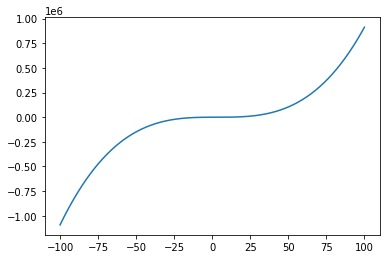

enter the starting point for the left: -25
enter the starting point for the right: 75
for how many iterations do you want to do: 21
for iteration 0 the values for xl,xr is [13.19660112501051,36.80339887498949]
for iteration 1 the values for xl,xr is [36.803398874989476,51.393202250021034]
for iteration 2 the values for xl,xr is [51.39320225002102,60.41019662496845]
for iteration 3 the values for xl,xr is [60.41019662496845,65.98300562505257]
for iteration 4 the values for xl,xr is [65.98300562505257,69.42719099991588]
for iteration 5 the values for xl,xr is [69.42719099991588,71.55581462513669]
for iteration 6 the values for xl,xr is [71.55581462513669,72.87137637477919]
for iteration 7 the values for xl,xr is [72.87137637477917,73.68443825035752]
for iteration 8 the values for xl,xr is [73.68443825035752,74.18693812442166]
for iteration 9 the values for xl,xr is [74.18693812442166,74.49750012593586]
for iteration 10 the values for xl,xr is [74.49750012593584,74.68943799848581]
for ite

In [2]:
f=lambda x: (x-3)**3
y=[]
X=np.linspace(-100,100,1000)
for i in range(len(X)):
    y.append(f(X[i]))
#plt.figure(figsize=(20,10))
plt.plot(X,y)
plt.show()
xl=float(input("enter the starting point for the left: "))
xr=float(input("enter the starting point for the right: "))
iter=int(input("for how many iterations do you want to do: "))
i=0
x1=0
x2=0
delta=(np.sqrt(5)-1)/2
#$$x_2=x_L+\delta (x_R-x_L)
#x_1=x_R-\delta (x_R-x_L) 
while i<=iter:
    x1=xr-delta*(xr-xl)
    x2=xl+delta*(xr-xl)
    if f(x1)>f(x2):
        xr=x2
        xl=xl
    elif f(x1)<f(x2):
        xl=x1
        xr=xr
    elif f(x1)==f(x2):
        xl=x1
        xr=x2
    print(f"for iteration {i} the values for xl,xr is [{x1},{x2}]")
    i=i+1
print(f"the points after iteration {iter} is [{x1},{x2}]")

# netwon raphson method
$$f(x)=x_1 ^ 3 + x_2 ^ 3-3 x_1 x_2$$


In [21]:
from sympy import symbols, diff
from sympy.matrices import Matrix, Inverse, Transpose
import numpy as np
def grad_f():
    x, y = symbols('x y', real = True)
    f = x**3 + y**3 - 3*x*y #x1 and x2 are x and y
    grad_f_trans = [diff(f,x),diff(f,y)] # using diff function from sympy to differentiate 
    #with respect to x and then with y to get grad f
    return grad_f_trans
def jacobi():      
    gf = grad_f() #returns form the gradf_f function
    x, y = symbols('x y', real = True) #real allows substitute values
    j_matrix = [[diff(gf[0],x), diff(gf[0],y)],[diff(gf[1],x), diff(gf[1],y)]]
    print(f"the jacobian matrix is: {j_matrix}")
    return j_matrix



def N_R_Method():    #takes j_matrix as an input
    x0 = Matrix([0,0])
    gf_trans = grad_f()
    j_M = jacobi()
    x, y = symbols('x y', real = True)
    j_M = [[j_M[0][0].subs(x, x0[0]).subs(y, x0[1]), j_M[0][1].subs(x,x0[0]).subs(y,x0[1])],[j_M[1][0].subs(x,x0[0]).subs(y,x0[1]),j_M[1][1].subs(x,x0[0]).subs(y,x0[1])]]
    j_M = Matrix(j_M)
    j_inv = Inverse(j_M)
    g_x0 = [gf_trans[0].subs(x,x0[0]).subs(y,x0[1]), gf_trans[1].subs(x,x0[0]).subs(y,x0[1])]
    g_x0 = Matrix(g_x0)
    for i in range(0,50):
        x1 = x0 - j_inv * g_x0
        x0 = x1
    return x0
N_R_Method()

the jacobian matrix is: [[6*x, -3], [-3, 6*y]]


Matrix([
[0],
[0]])

# gradient desent
$$X_k+1 = X_k +r_k \delta f(X_k)$$
$r_k$ i s  fixed to 0.2 

example question
$$Maximize f(x)=x^4$$
let the starting point $X_0$ be (1)

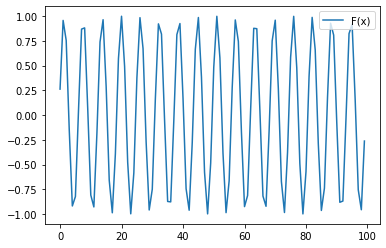

-3.00000000000000

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
X=np.linspace(-50,50,100)

x,y=symbols('x y',real=True)
f=lambda x: np.sin(x)
z=[]
for i in range(len(X)):
    z.append(f(X[i]))
plt.plot(z,label="F(x)")
plt.legend(loc=1)
plt.show()
def gradf():
    x=symbols('x',real=True)
    f= x**4
    gradf_trans=diff(f,x)
    return gradf_trans
def gradient_descent():
    #Xk+1 = Xk + rk∇f1Xk2
    x0=1
    x=symbols('x',real=True)
    r=0.02 #learning rate is fixed here
    gf=gradf()
    g_x0=gf.subs(x,x0)
    for i in range(0,50):
        x1=x0-r*g_x0
        x0=x1
    return x0
gradient_descent()